## House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
house_price=pd.read_csv('housing.csv')
house_price.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
house_price['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse_output=False)


house_price_c=house_price[['ocean_proximity']].copy()
house_price_c_enc=enc.fit_transform(house_price_c)
column_names=enc.get_feature_names_out(['ocean_proximity'])
house_price_c_df=pd.DataFrame(house_price_c_enc,columns=column_names)
house_price_c_df


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


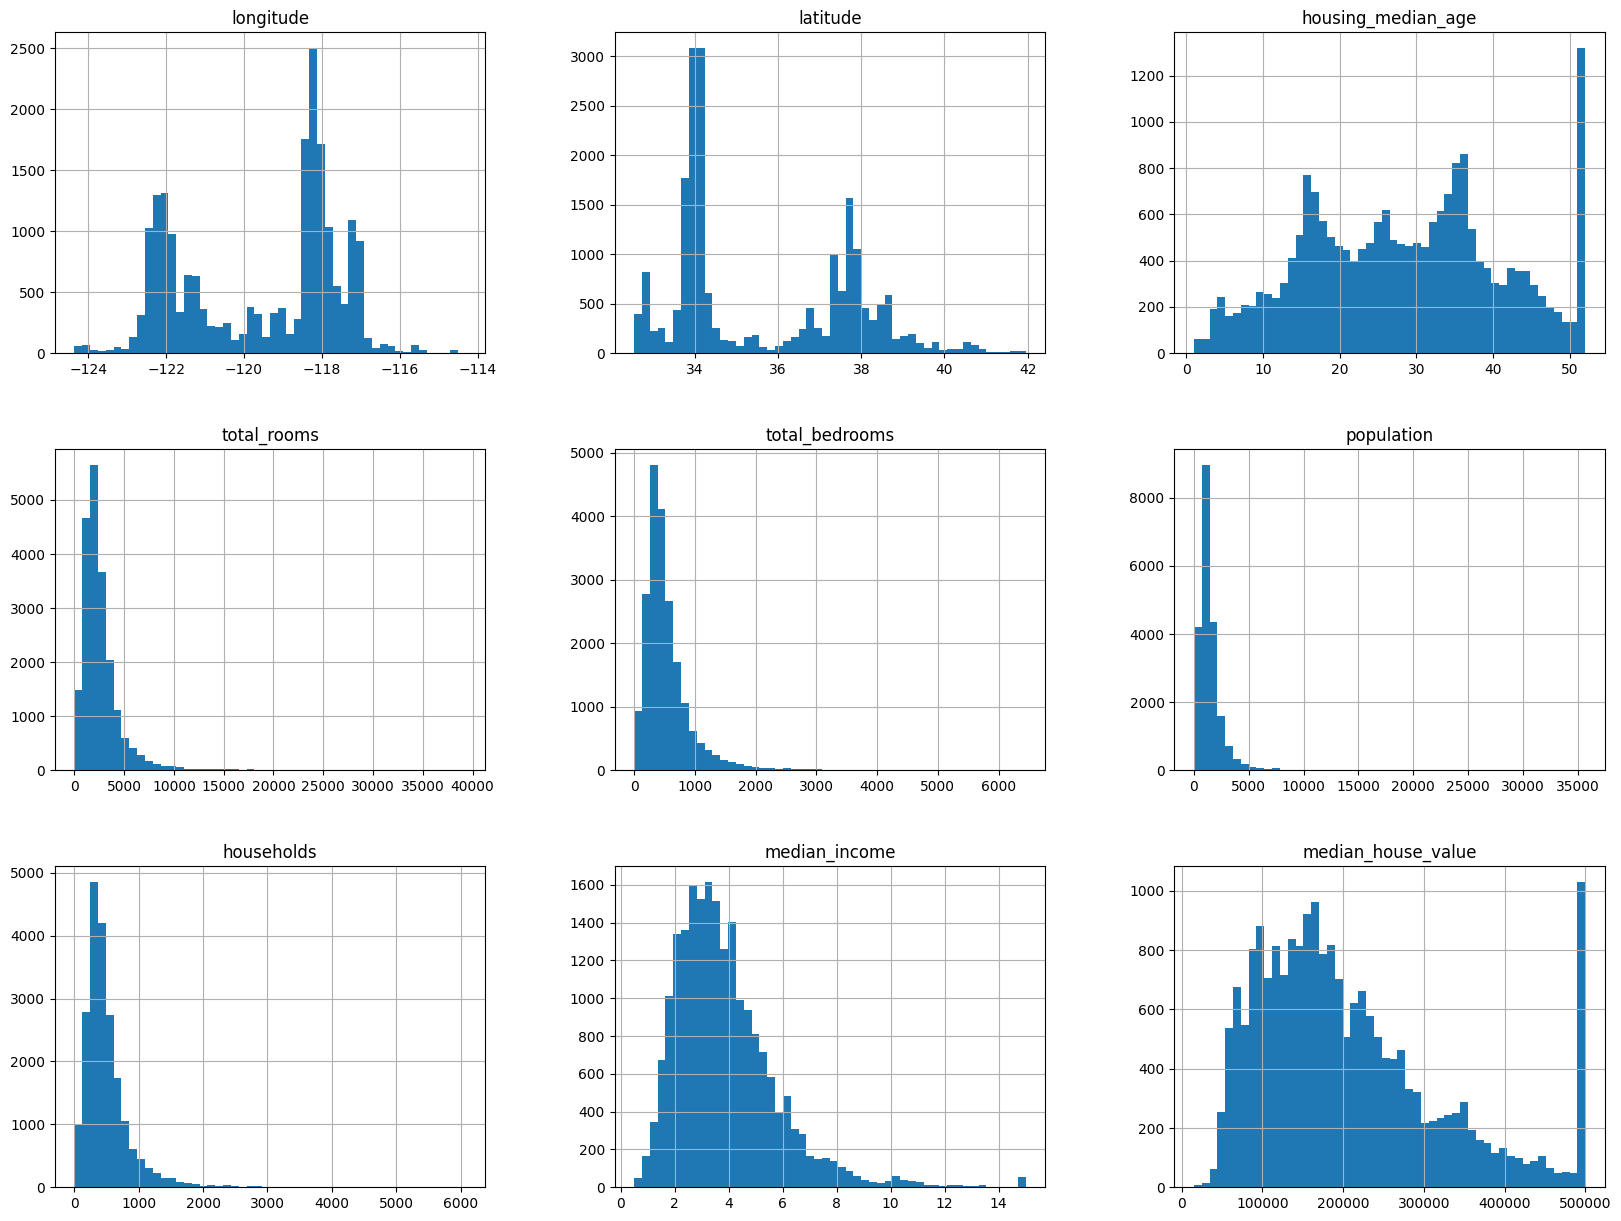

In [6]:
house_price.hist(bins=50, figsize=(20,15))
plt.show() 

In [7]:
#imputer method
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='median')
#median function works only on numeric data, some may work on string data
#so dropping literal data row
ocean_proximity=house_price['ocean_proximity']
house_price_num=house_price.drop(columns='ocean_proximity')

imp.fit(house_price_num)
X=imp.transform(house_price_num)    #o/p is a np array not a dataframe
house_price1=pd.DataFrame(X,columns=house_price_num.columns)   #columns to name the columns
house_price1=pd.concat([house_price1,house_price_c_df],axis=1)
house_price1


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [8]:
house_price['rooms_per_household'] = house_price['total_rooms'] / house_price['households']
house_price['bedrooms_per_room'] = house_price['total_bedrooms'] / house_price['total_rooms']
house_price['population_per_household'] = house_price['population'] /house_price['households']


In [9]:
house_price1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  float64
 10  ocean_proximity_INLAND      20640 non-null  float64
 11  ocean_proximity_ISLAND      20640 non-null  float64
 12  ocean_proximity_NEAR BAY    20640 non-null  float64
 13  ocean_proximity_NEAR OCEAN  206

In [10]:
#median=train_data['total_bedrooms'].median()
#train_data['total_bedrooms'].fillna(median,inplace=True)

### Preprocessing

In [11]:
house_price1['total_rooms']=np.log(house_price1['total_rooms'])
house_price1['total_bedrooms']=np.log(house_price1['total_bedrooms'])
house_price1['population']=np.log(house_price1['population'])
house_price1['households']=np.log(house_price1['households'])

In [12]:
from sklearn.model_selection import train_test_split
X=house_price1.drop(columns=['median_house_value'])            #feature vectors
y=house_price1['median_house_value']                         #target variable

X_train_val,X_test,y_train_val,y_test=train_test_split(X,y,test_size=0.2, shuffle=True,random_state=42)   #train+val and test
X_train,X_val,y_train,y_val=train_test_split(X_train_val,y_train_val,test_size=0.25, shuffle=True,random_state=42)  #train and val

print(len(X_train))
print(len(X_val))
print(len(X_test))


12384
4128
4128


In [13]:
train_data=X_train.join(y_train)
   #combining features and target

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12384 entries, 17244 to 8472
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   12384 non-null  float64
 1   latitude                    12384 non-null  float64
 2   housing_median_age          12384 non-null  float64
 3   total_rooms                 12384 non-null  float64
 4   total_bedrooms              12384 non-null  float64
 5   population                  12384 non-null  float64
 6   households                  12384 non-null  float64
 7   median_income               12384 non-null  float64
 8   ocean_proximity_<1H OCEAN   12384 non-null  float64
 9   ocean_proximity_INLAND      12384 non-null  float64
 10  ocean_proximity_ISLAND      12384 non-null  float64
 11  ocean_proximity_NEAR BAY    12384 non-null  float64
 12  ocean_proximity_NEAR OCEAN  12384 non-null  float64
 13  median_house_value          12384

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'ocean_proximity_<1H OCEAN'}>,
        <Axes: title={'center': 'ocean_proximity_INLAND'}>,
        <Axes: title={'center': 'ocean_proximity_ISLAND'}>,
        <Axes: title={'center': 'ocean_proximity_NEAR BAY'}>],
       [<Axes: title={'center': 'ocean_proximity_NEAR OCEAN'}>,
        <Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

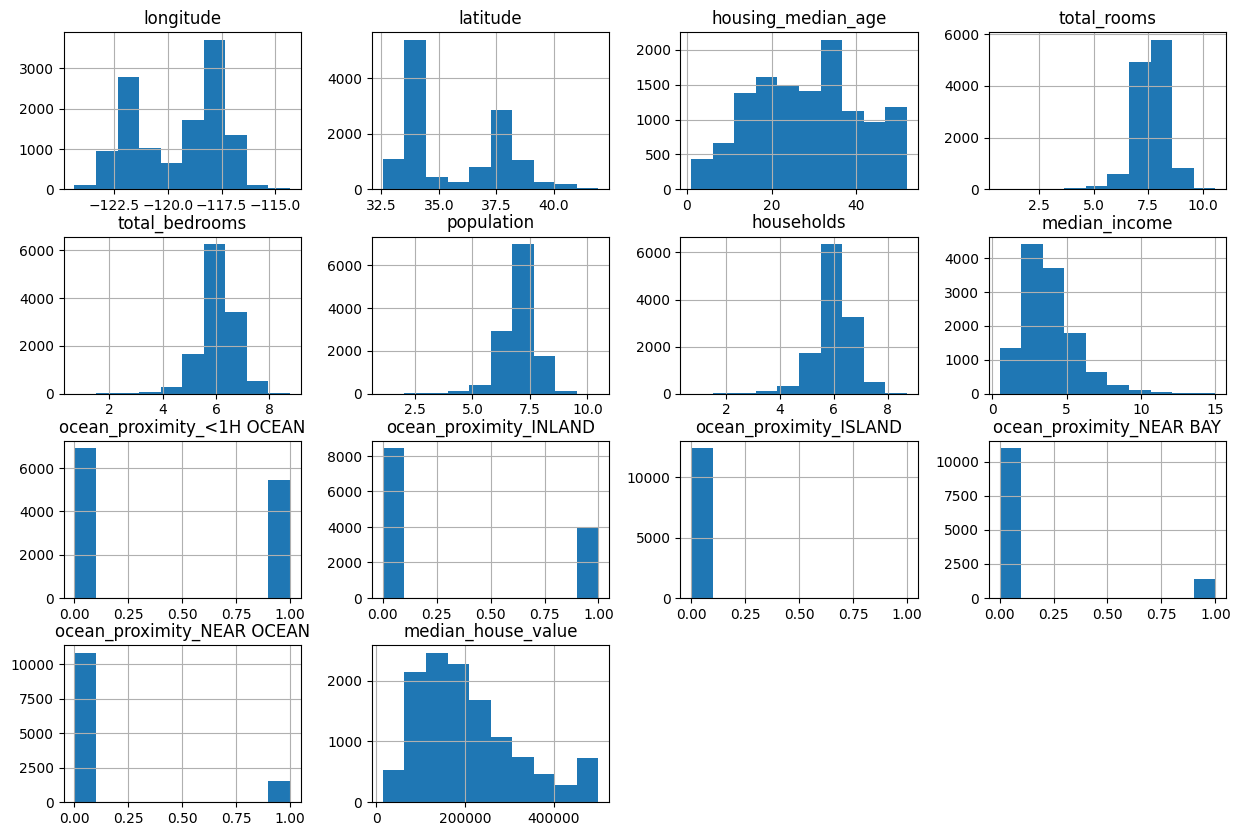

In [15]:
train_data.hist(figsize=(15,10))


<Axes: title={'center': 'Correlation Heatmap'}>

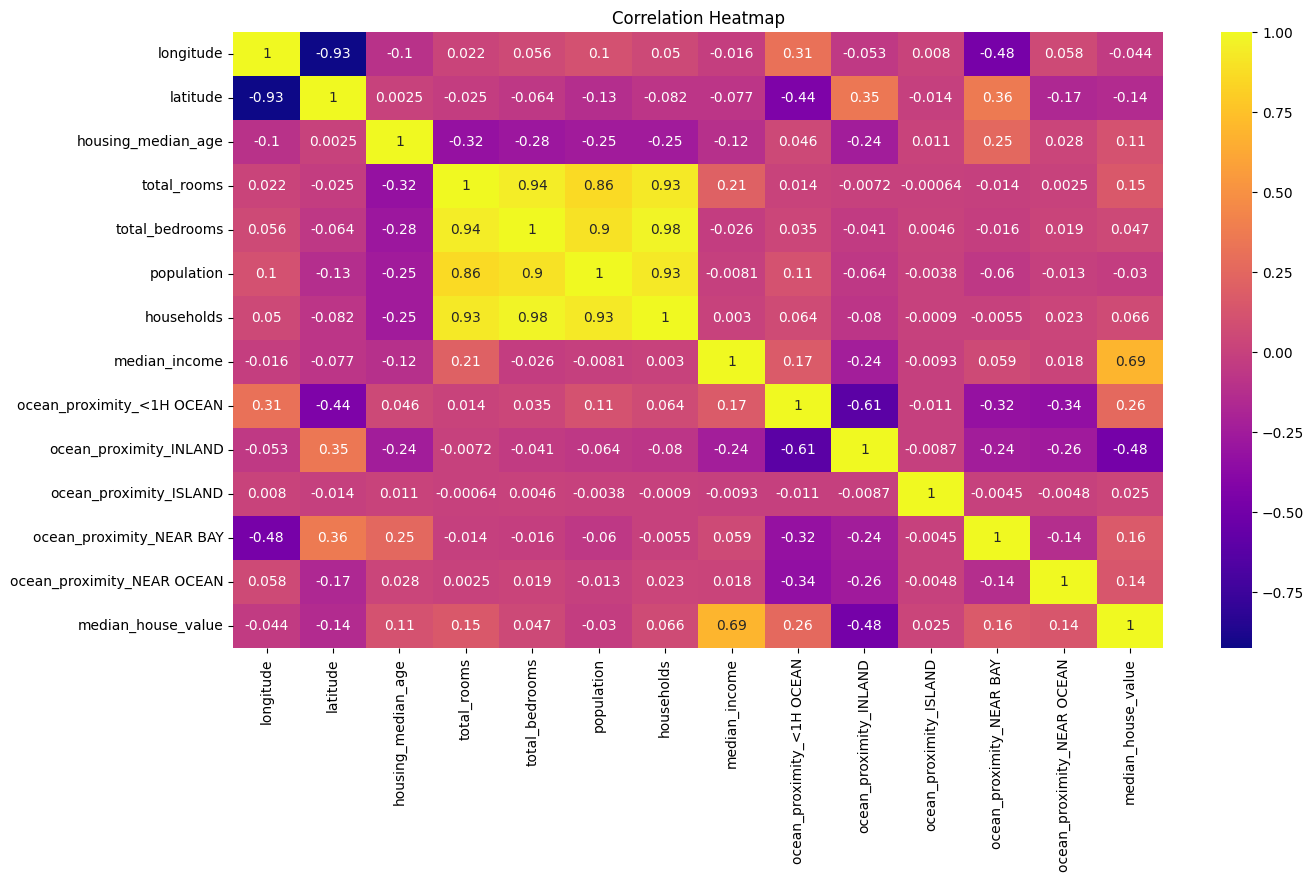

In [16]:
plt.figure(figsize=(15,8))
plt.title("Correlation Heatmap")
sb.heatmap(train_data.corr(),annot=True,cmap='plasma')

## Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression() 

reg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
reg.score(X_test,y_test)

0.6326629457279318

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()

forest.fit(X_train,y_train)
forest.score(X_test,y_test)
    

0.8100377217300643

## Evaluation

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

#Linear Regression
y_pred_lin = reg.predict(X_val)

# Metrics
mse_lin = mean_squared_error(y_val, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
mae_lin = mean_absolute_error(y_val, y_pred_lin)
r2_lin = r2_score(y_val, y_pred_lin)

print("Linear Regression on Validation Set:")
print(f"RMSE: {rmse_lin:.2f}")
print(f"MAE:  {mae_lin:.2f}")
print(f"R²:   {r2_lin:.2f}")


Linear Regression on Validation Set:
RMSE: 66426.39
MAE:  48288.36
R²:   0.68


In [23]:
#Random forest
y_pred_rf = forest.predict(X_val)

# Metrics
mse_rf = mean_squared_error(y_val, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

print("Random Forest on Validation Set:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE:  {mae_rf:.2f}")
print(f"R²:   {r2_rf:.2f}")


Random Forest on Validation Set:
RMSE: 49737.92
MAE:  32532.10
R²:   0.82
